# Hypothesis Formulation - Null and Alternate Hypothesis


These four situations appear in a large fraction of statistical analyses,

    One Population Proportion
    A difference in Population Proportions
    One Population Mean
    A difference in Population Means

# One Population Proportion

In previous years, 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media?

Population: Parents with a teenager (age 13–18)
Parameter of Interest: p (proportion)

Null Hypothesis: p = 0.52
Alternative Hypothesis: p > 0.52 (note that this is a one-sided test)

Data: 1018 people were surveyed. 56% of those who were surveyed believe that their teenager’s lack of sleep is caused due to electronics and social media.

Approach: Single group proportion uses z-statistic test. We use theproportions_ztest() function from the Statsmodels package. Note the argument alternative="larger" indicating a one-sided test. The function returns two values - the z-statistic and the corresponding p-value.

In [3]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

n = 1018
pnull = 0.52
phat = 0.56
sm.stats.proportions_ztest(phat * n, n, pnull, alternative="larger")

(2.571067795759113, 0.005069273865860533)

Conclusion: Since the calculated p-value (~0.005) of the z-test is pretty small, we can reject the Null hypothesis that the percentage of parents, who believe that their teenager’s lack of sleep is caused due to electronics and social media, is as same as previous years’ estimate i.e. 52%. Although we do not accept the alternative hypothesis, this informally means that there is a good chance of this proportion being more than 52%.

# A difference in Population Proportions

Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

Populations: All parents of black children age 6–18 and all parents of Hispanic children age 6–18
Parameter of Interest: p1 — p2, where p1 = black and p2 = Hispanic

Null Hypothesis: p1 — p2 = 0
Alternative Hypothesis: p1 — p2 ≠ 0

Data: 247 Parents of Black Children. 36.8% of parents report that their child has had some swimming lessons. 308 Parents of Hispanic Children. 38.9% of parents report that their child has had some swimming lessons.

Approach: The difference in population proportion needs t-test. Also, the population follows a binomial distribution here. We can just pass on the two population quantities with the appropriate binomial distribution parameters to the t-test function.

We can use thettest_ind() function from Statsmodels. The function returns three values: (a) test statistic, (b) p-value of the t-test, and (c) degrees of freedom used in the t-test.

In [6]:
n1 = 247
p1 = 0.37

n2 = 308
p2 = 0.39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

sm.stats.ttest_ind(population1, population2)

(-0.5509753903525183, 0.5818730678288508, 553.0)

Conclusion: Since the p-value (~0.5818) is quite high, we cannot reject the Null hypothesis that the difference in the population proportions is zero.

# One Population Mean

Let’s say a cartwheeling competition was organized for some adults. The data looks like following,

(80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01)

Is the average cartwheel distance (in inches) for adults more than 80 inches?

Population: All adults
Parameter of Interest: μ, the population mean cartwheel distance.

Null Hypothesis: μ = 80
Alternative Hypothesis: μ > 80

Data:
25 adult participants.
μ=83.84
σ=10.72

Approach: We use the z-test from Statsmodels package with alternate='larger' as an argument to denote the one-tailed test.

In [9]:
cwdata = np.array(
    [
        80.57,
        98.96,
        85.28,
        83.83,
        69.94,
        89.59,
        91.09,
        66.25,
        91.21,
        82.7,
        73.54,
        81.99,
        54.01,
        82.89,
        75.88,
        98.32,
        107.2,
        85.53,
        79.08,
        84.3,
        89.32,
        86.35,
        78.98,
        92.26,
        87.01,
    ]
)

In [10]:
n = len(cwdata)
mean = cwdata.mean()
sd = cwdata.std()
(n, mean, sd)

(25, 83.84320000000001, 10.716018932420752)

In [11]:
sm.stats.ztest(cwdata, value=80, alternative="larger")

(1.756973189172546, 0.039461189601168366)

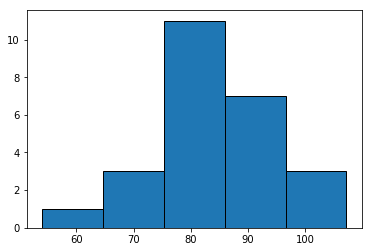

In [12]:
plt.hist(cwdata, bins=5, edgecolor="k")
plt.show()

Conclusion: Since the p-value (0.0394) is lower than the standard confidence level 0.05, we can reject the Null hypothesis that the mean cartwheel distance for adults (a population quantity) is equal to 80 inches. There is strong evidence in support for the alternative hypothesis that the mean cartwheel distance is, in fact, higher than 80 inches.

Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

Perspective: The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations.

Population: Adults in the NHANES data.
Parameter of Interest: μ1−μ2μ1−μ2, Body Mass Index.

Null Hypothesis: μ1=μ2
Alternative Hypothesis: μ1≠μ2

Data:

2976 Females, μ1=29.94, σ1=7.75
2759 Male Adults, μ2=28.78, σ2=6.25

μ1−μ2=1.16

Approach: We can again use the z-statistic for this hypothesis testing. But here the test has to be “two-sided” as an inequality appears in the alternative hypothesis i.e. the BMI can be either higher or lower for males than females. Both side probabilities have to be added for p-value calculation.

In [15]:
import pandas as pd

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]
sm.stats.ztest(
    females["BMXBMI"].dropna(), male["BMXBMI"].dropna(), alternative="two-sided"
)

(6.1755933531383205, 6.591544431126401e-10)

Conclusion: Since the p-value (6.59e-10) is extremely small, we can reject the Null hypothesis that the mean BMI of males is the same as that of females.